# Bechmarck de Modelos Supervisados en el dataset

El dataset en el que se va a trabajar es un dataset conocido, se llama "winequality". Se acordo con el profersor utilizar este dataset debido a la complejidad del dataset primeramente escogido y el poco tiempo restante para la entrega.

Primeramente se importan las dependencias y el dataset:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv("dataset/datasets_4458_8204_winequality-red.csv")

[Instances,features] = dataset.shape
print("Instances count = ",Instances)
print("Features count = ",features)

#dataset.head()
index_target = np.where(dataset.columns.values == "quality")[0][0]

Instances count =  1599
Features count =  12


## Analisis EDA

Se realiza un analisis EDA sobre los datos de cada feature:

In [2]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Se toma la comlumna "quality" como target, por tanto lo features son:

In [2]:
features = np.delete(dataset.columns.values, index_target)
target = dataset.columns.values[index_target]

print("Features: ",features)

Features:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


### Distribucion de los features

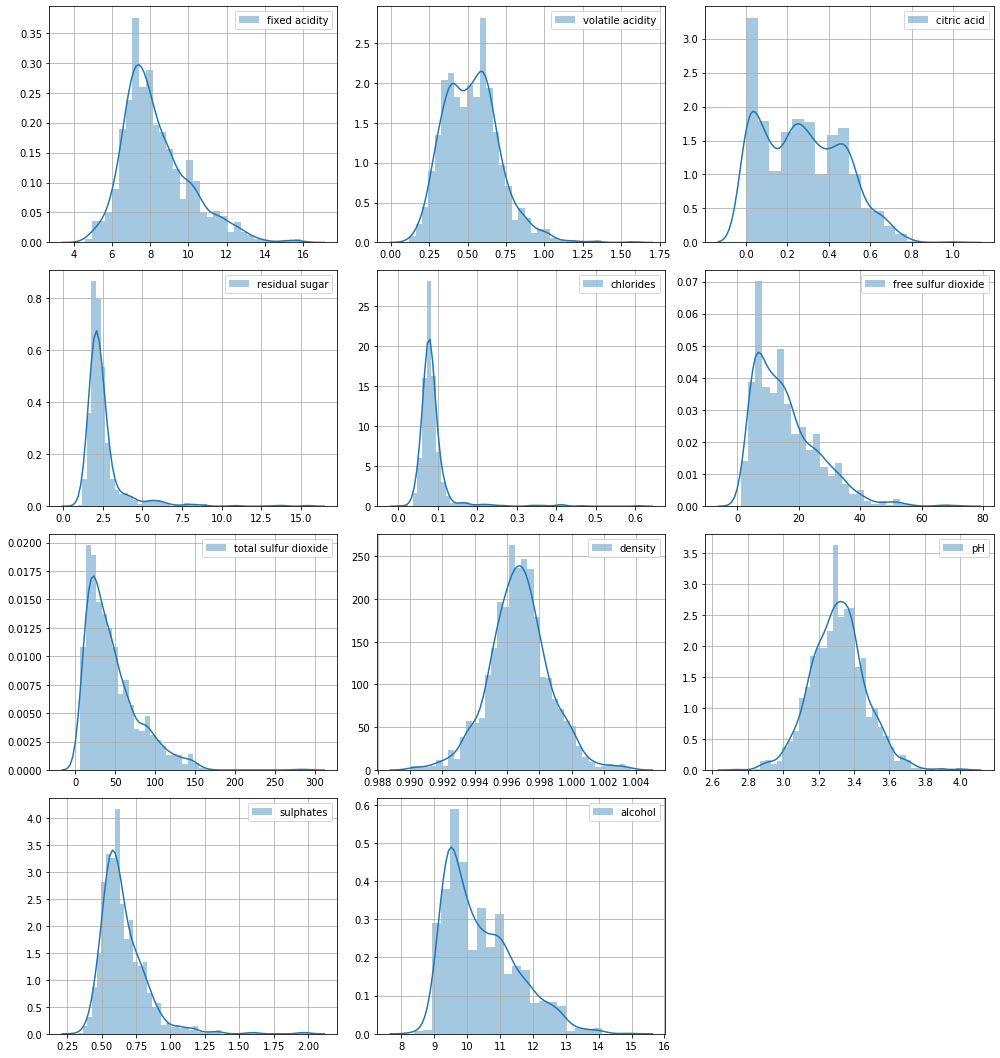

In [3]:
plt.figure(figsize=(14,15))
for i,ft in enumerate(list(features)):
    plt.subplot(4,3,i+1)
    sns.distplot(dataset[ft],label=ft)
    plt.grid()
    plt.tight_layout()
    plt.legend(loc="upper right")
    plt.xlabel("")


Se observa que en su mayoria, los features tienen una distribucion cercana a ser Normal o chi cuadrado.

El comportamiento del target se muestra mas concentrado en el

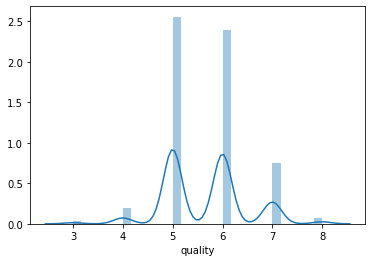

In [5]:
sns.distplot(dataset["quality"],label="quality")

La distribucion del target de centra mas en 5 y 6, mientras que son muy pocas instancias que resultan en 3, 4 y 8.

### Correlacion entre features

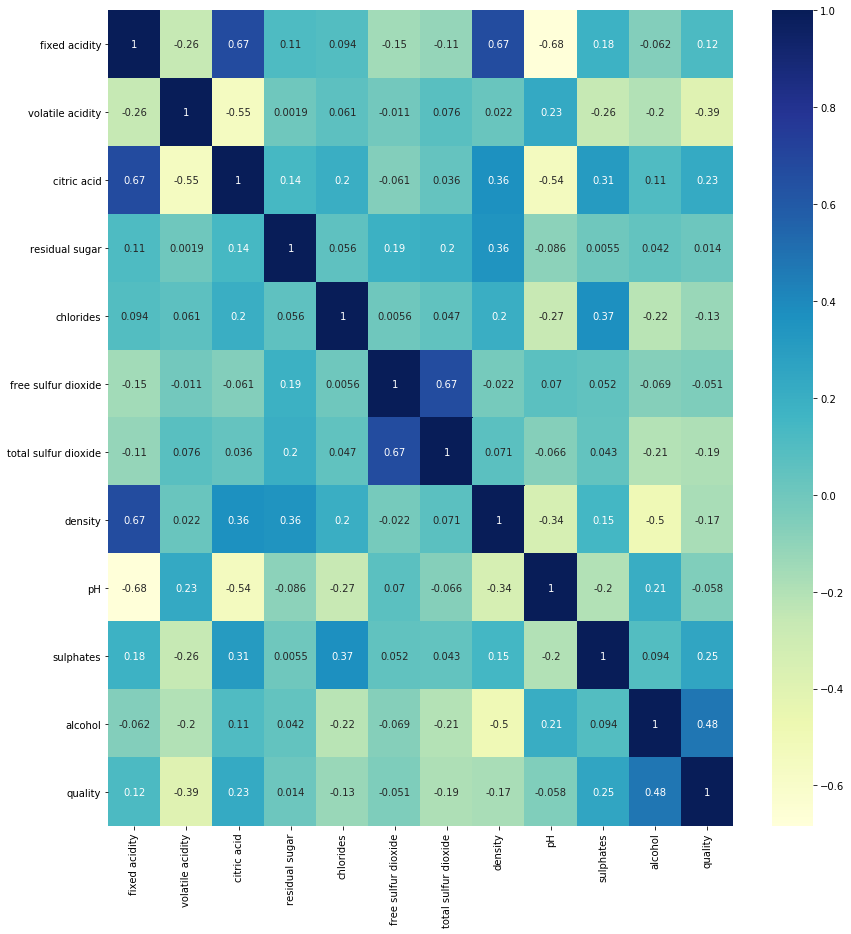

In [165]:
plt.figure(figsize=(14,15))
sns.heatmap(dataset.corr(),cmap="YlGnBu",annot=True)

Esto muestra una alta correlacion entre ciertos features como; "fixed acidity" y "citric acid", tambien los entre los features "fixed acidity" y "density". Mientras que target "quality" muestra una alta correlacion con el feature "alcohol" y con "sulphates", mientras que con "volatile acidity" muestra una baja correlaccion por lo que este feature podria eliminarse.

### Relacion de dispercion

Tambien se puedemos ver la relacion entre los features y el target mediante una grafica de dispercion

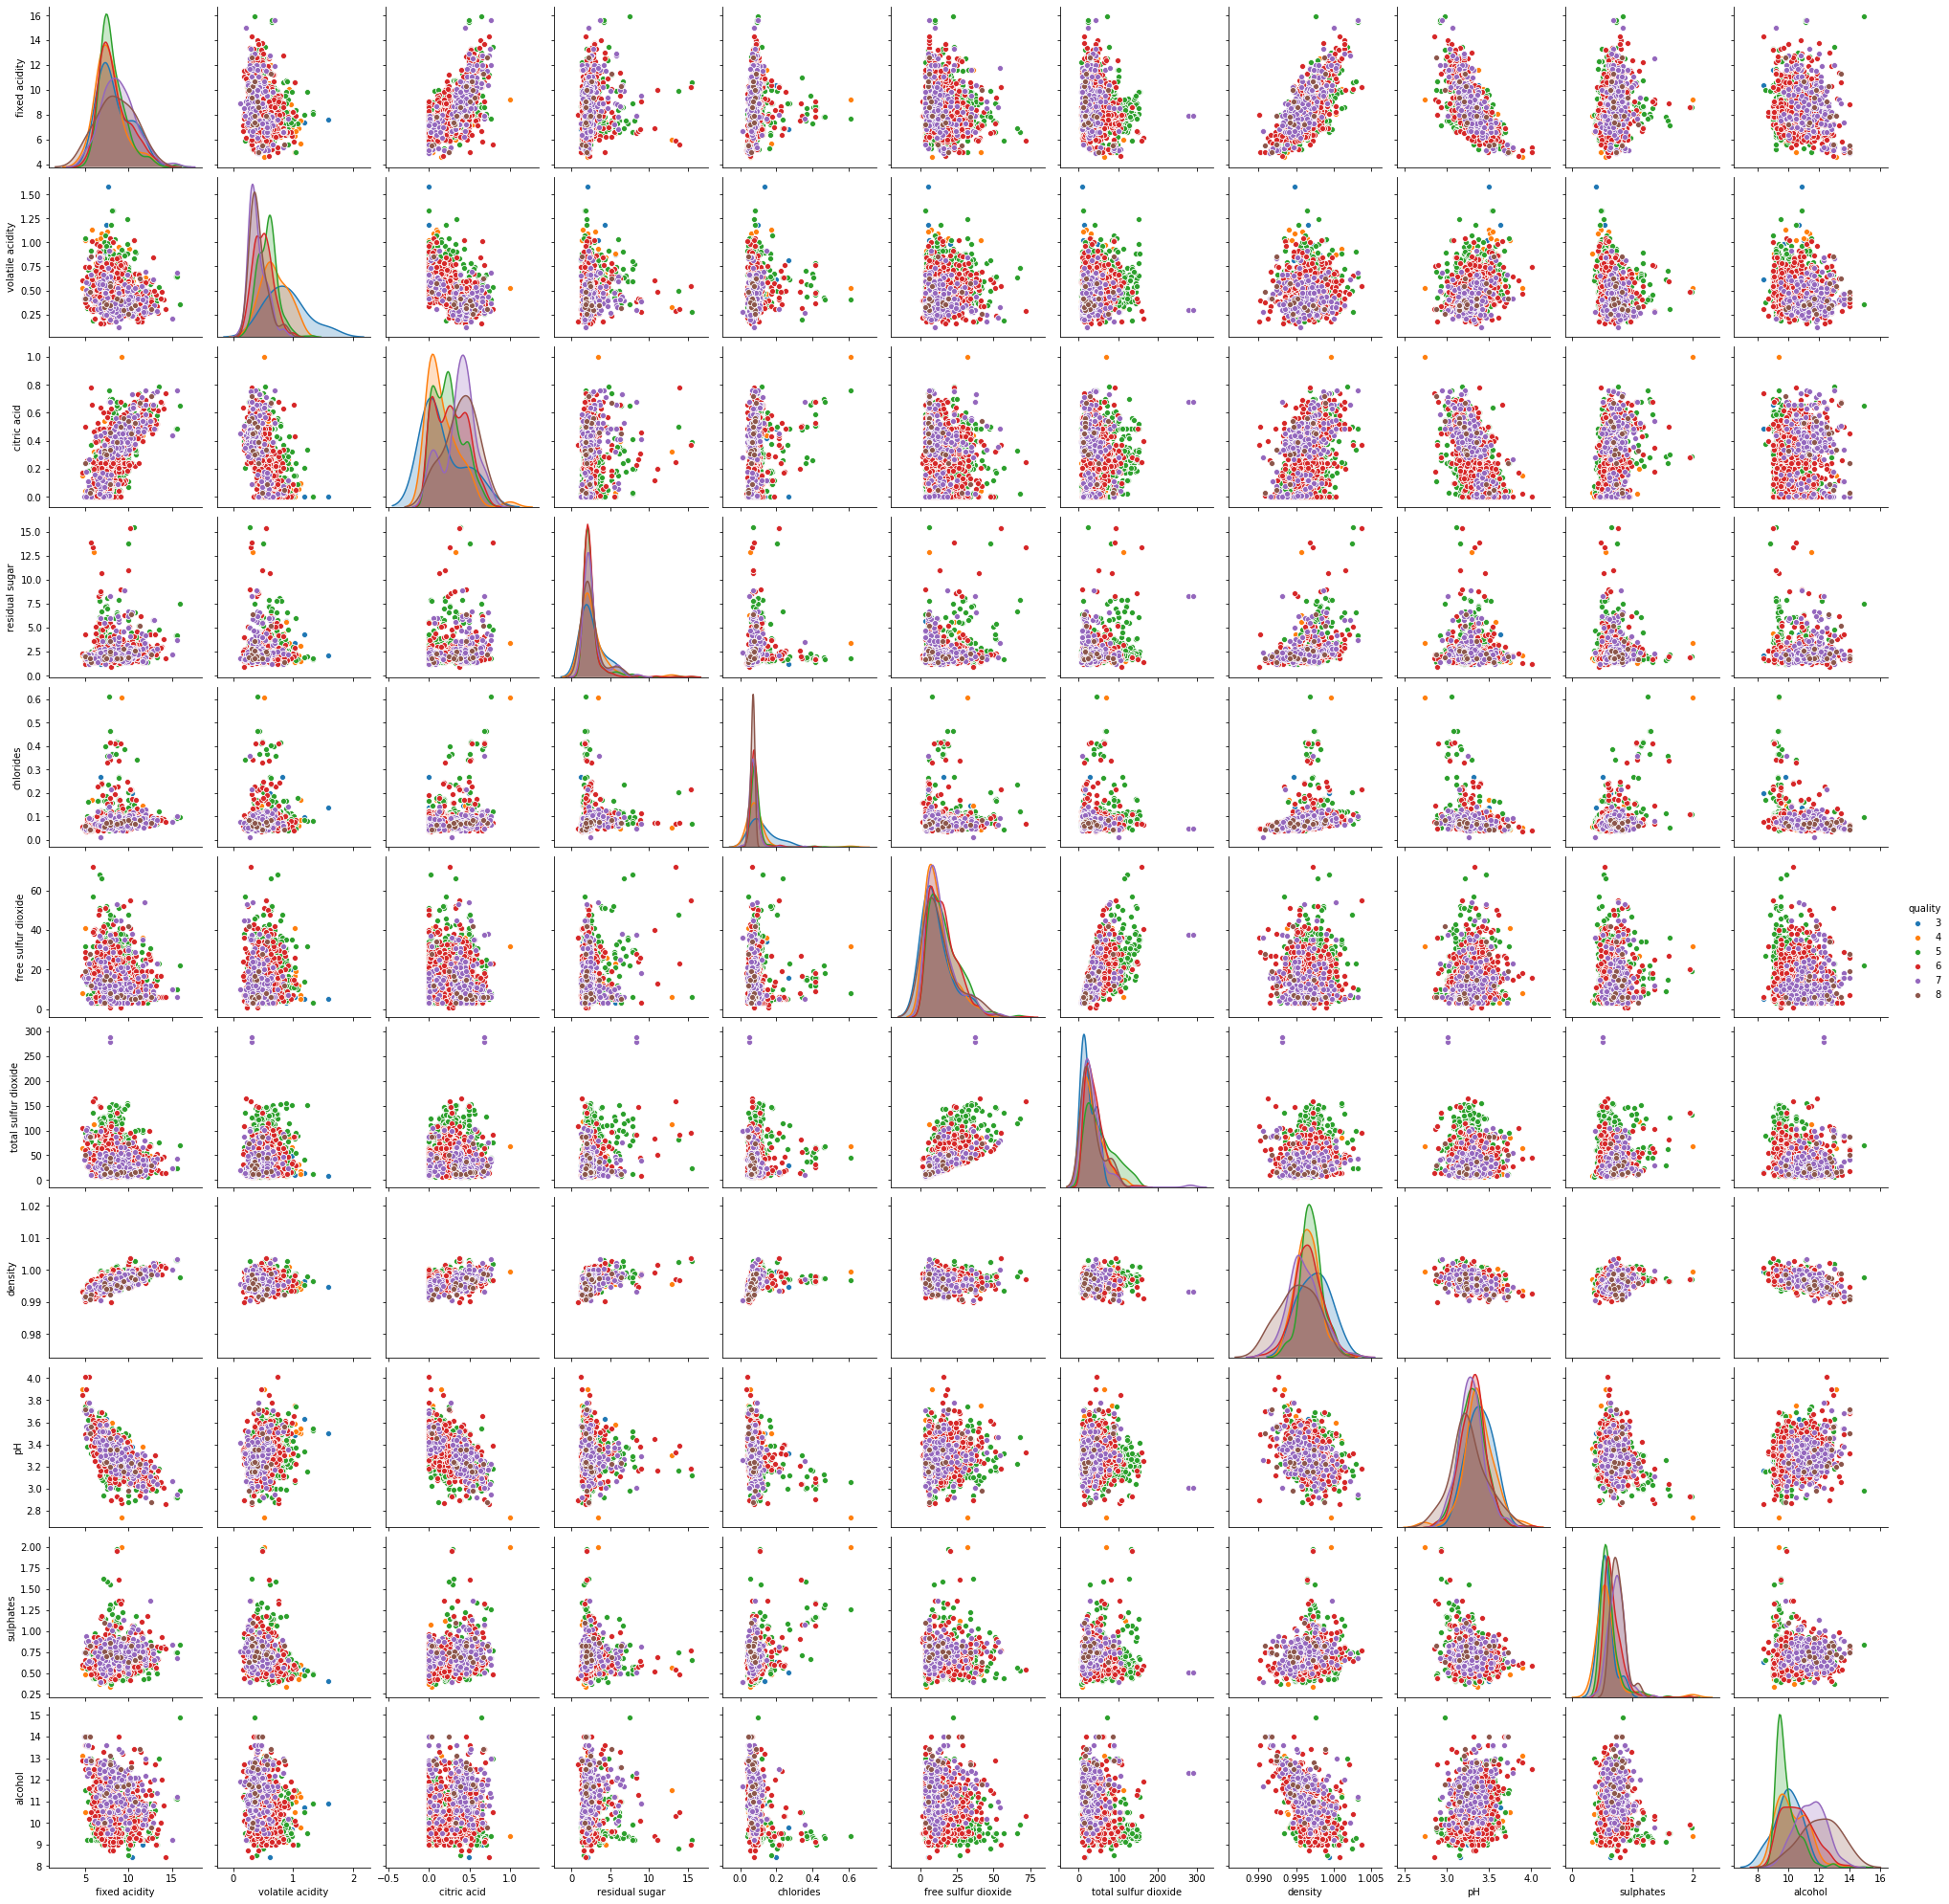

In [166]:
sns.pairplot(dataset,hue="quality")

Se puede observar que los datos tienen un comportamiento similar al observado en la grafica de correlacion. Tambien se puede observar que establcer el limite de decision no es trivial, visualmente es dificil determinarlo.

## Separacion de datos en training - testing y normalizacion

Para el training se utilizara un 70% de los datos y para el testing un 30%.

In [4]:
from sklearn.model_selection import train_test_split
Y = dataset.quality
X = dataset.drop('quality', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)

print("Total train rows: ",len(X_train))
print("Total test rows: ",len(X_test))

Total train rows:  1119
Total test rows:  480


In [5]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

## Primera exploracion de algortimos de aprendizaje

### Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB

Naive_Bayes = GaussianNB().fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(Naive_Bayes.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(Naive_Bayes.score(X_test_scaled, Y_test)))

Training set score: 0.556
Test set score: 0.565


### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(tree.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test_scaled, Y_test)))

Training set score: 1.000
Test set score: 0.571


Se tiene un problema claro de overfitting debido a que probablemente se tienen hojas puras. Para evitar esto, se varia el parametro ```max_depth```, que determina la profundidad maxima del arbol.

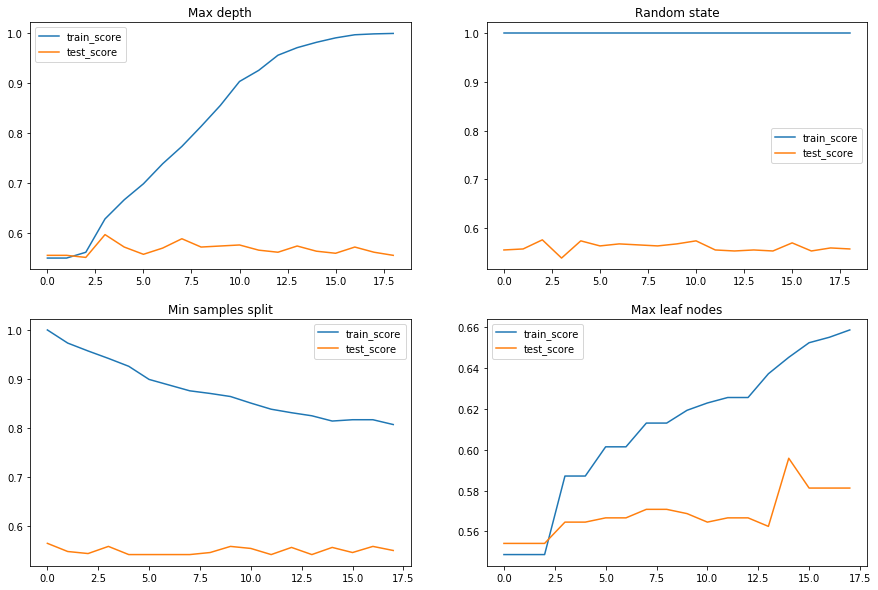

In [8]:
train_score_md = []
test_score_md = []
for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth=i).fit(X_train_scaled, Y_train)
    train_score_md.append(tree.score(X_train_scaled, Y_train))
    test_score_md.append(tree.score(X_test_scaled, Y_test))

train_score_rs = []
test_score_rs = []
for i in range(1,20):
    tree = DecisionTreeClassifier(random_state=i).fit(X_train_scaled, Y_train)
    train_score_rs.append(tree.score(X_train_scaled, Y_train))
    test_score_rs.append(tree.score(X_test_scaled, Y_test))

train_score_ss = []
test_score_ss = []
for i in range(2,20):
    tree = DecisionTreeClassifier(min_samples_split=i).fit(X_train_scaled, Y_train)
    train_score_ss.append(tree.score(X_train_scaled, Y_train))
    test_score_ss.append(tree.score(X_test_scaled, Y_test))

train_score_ln = []
test_score_ln = []
for i in range(2,20):
    tree = DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train_scaled, Y_train)
    train_score_ln.append(tree.score(X_train_scaled, Y_train))
    test_score_ln.append(tree.score(X_test_scaled, Y_test))



fig = plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(train_score_md,label="train_score")
plt.plot(test_score_md,label="test_score")
plt.title("Max depth")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_score_rs,label="train_score")
plt.plot(test_score_rs,label="test_score")
plt.title("Random state")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_score_ss,label="train_score")
plt.plot(test_score_ss,label="test_score")
plt.title("Min samples split")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_score_ln,label="train_score")
plt.plot(test_score_ln,label="test_score")
plt.title("Max leaf nodes")
plt.legend()


plt.show()

De estas graficas se puede determinar que los hiperparametros que se variaron impactan mas en el training score que en el test score, teneindo aun asi un alto overfitting. Para reducir un poco el overfitting se puede tener usar estos parametros:

In [9]:
tree = DecisionTreeClassifier(max_depth=15,min_samples_split=15,max_leaf_nodes=10).fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(tree.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test_scaled, Y_test)))

Training set score: 0.613
Test set score: 0.571


### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5).fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(rf.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test_scaled, Y_test)))

Training set score: 0.951
Test set score: 0.652


Igual que el algorimto de "Decision tree" se presenta un alto overfitting.

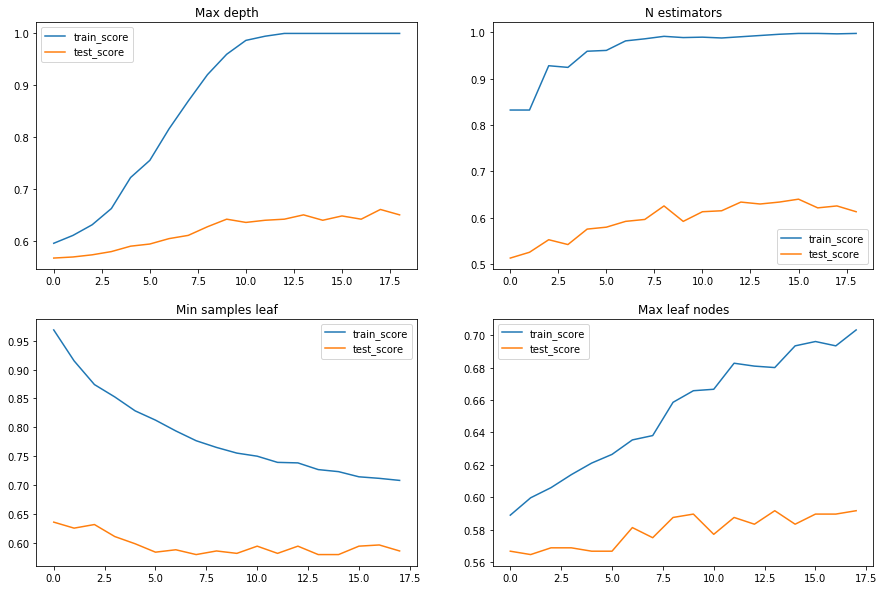

In [10]:
train_score_md = []
test_score_md = []
for i in range(1,20):
    rf = RandomForestClassifier(max_depth=i).fit(X_train_scaled, Y_train)
    train_score_md.append(rf.score(X_train_scaled, Y_train))
    test_score_md.append(rf.score(X_test_scaled, Y_test))

train_score_ne = []
test_score_ne = []
for i in range(1,20):
    rf = RandomForestClassifier(n_estimators=i).fit(X_train_scaled, Y_train)
    train_score_ne.append(rf.score(X_train_scaled, Y_train))
    test_score_ne.append(rf.score(X_test_scaled, Y_test))

train_score_ss = []
test_score_ss = []
for i in range(2,20):
    rf = RandomForestClassifier(min_samples_leaf=i).fit(X_train_scaled, Y_train)
    train_score_ss.append(rf.score(X_train_scaled, Y_train))
    test_score_ss.append(rf.score(X_test_scaled, Y_test))

train_score_ln = []
test_score_ln = []
for i in range(2,20):
    rf = RandomForestClassifier(max_leaf_nodes=i).fit(X_train_scaled, Y_train)
    train_score_ln.append(rf.score(X_train_scaled, Y_train))
    test_score_ln.append(rf.score(X_test_scaled, Y_test))



fig = plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(train_score_md,label="train_score")
plt.plot(test_score_md,label="test_score")
plt.title("Max depth")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_score_ne,label="train_score")
plt.plot(test_score_ne,label="test_score")
plt.title("N estimators")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_score_ss,label="train_score")
plt.plot(test_score_ss,label="test_score")
plt.title("Min samples leaf")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_score_ln,label="train_score")
plt.plot(test_score_ln,label="test_score")
plt.title("Max leaf nodes")
plt.legend()

plt.show()

De aqui se puede ver que en la mayoria de los casos tenemos overfitting, sin embargo se puede buscar una combinacion de hiperparametros para buscar un balance.

Se tiene que un ```max_depth=8```, un ```min_samples_leaf=13``` y un ```max_leaft_nodes=6``` puede determinar cierto balance:

In [11]:
rf = RandomForestClassifier(max_depth=8,max_leaf_nodes=6,min_samples_leaf=13).fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(rf.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test_scaled, Y_test)))

Training set score: 0.602
Test set score: 0.598


Aunque se puede ver cierto balance eliminando el overfitting, los scores no son buenos.

### KNerest

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier().fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(KNC.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(KNC.score(X_test_scaled, Y_test)))

Training set score: 0.695
Test set score: 0.573


Si tiene cierto balance pero los scores no son buenos, necesitan mejorarse.

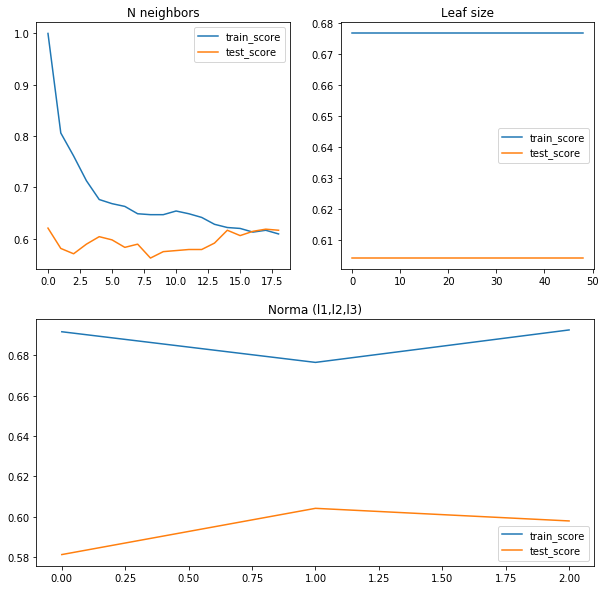

In [24]:
train_score_k = []
test_score_k = []
for i in range(1,20):
    KNC = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, Y_train)
    train_score_k.append(KNC.score(X_train_scaled, Y_train))
    test_score_k.append(KNC.score(X_test_scaled, Y_test))

train_score_ls = []
test_score_ls = []
for i in range(1,50):
    KNC = KNeighborsClassifier(leaf_size=i).fit(X_train_scaled, Y_train)
    train_score_ls.append(KNC.score(X_train_scaled, Y_train))
    test_score_ls.append(KNC.score(X_test_scaled, Y_test))

train_score_p = []
test_score_p = []
for i in range(1,4):
    KNC = KNeighborsClassifier(p=i).fit(X_train_scaled, Y_train)
    train_score_p.append(KNC.score(X_train_scaled, Y_train))
    test_score_p.append(KNC.score(X_test_scaled, Y_test))

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(train_score_k,label="train_score")
plt.plot(test_score_k,label="test_score")
plt.title("N neighbors")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_score_ls,label="train_score")
plt.plot(test_score_ls,label="test_score")
plt.title("Leaf size")
plt.legend()

plt.subplot(2, 2, (3,4))
plt.plot(train_score_p,label="train_score")
plt.plot(test_score_p,label="test_score")
plt.title("Norma (l1,l2,l3)")
plt.legend()

plt.show()

El hiperparametro ```leaf_size``` no tiene ningun impacto en los scores. Se puede buscar cierto balance para reducir el overfitting utilizando ```n_neighbors=11``` y norma l3 ```p=3```. 

In [13]:
KNC = KNeighborsClassifier(n_neighbors=11,p=3).fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(KNC.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(KNC.score(X_test_scaled, Y_test)))

Training set score: 0.643
Test set score: 0.556


Aun asi los scores no son buenos.

### ADA boost

In [14]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier().fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(ADA.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(ADA.score(X_test_scaled, Y_test)))

Training set score: 0.534
Test set score: 0.533


Igual que lo algoritmos anteriores este muestra valores balanceados pero muy bajos.

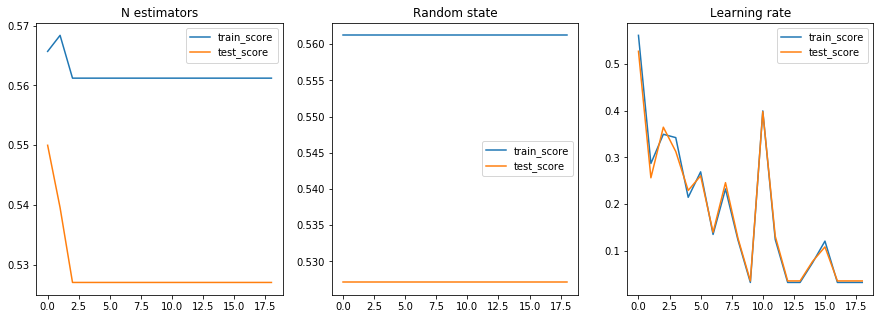

In [16]:
train_score_ne = []
test_score_ne = []
for i in range(1,20):
    ADA = AdaBoostClassifier(n_estimators=i).fit(X_train_scaled, Y_train)
    train_score_ne.append(ADA.score(X_train_scaled, Y_train))
    test_score_ne.append(ADA.score(X_test_scaled, Y_test))

train_score_rs = []
test_score_rs = []
for i in range(1,20):
    ADA = AdaBoostClassifier(random_state=i).fit(X_train_scaled, Y_train)
    train_score_rs.append(ADA.score(X_train_scaled, Y_train))
    test_score_rs.append(ADA.score(X_test_scaled, Y_test))

train_score_lr = []
test_score_lr = []
for i in range(1,20):
    ADA = AdaBoostClassifier(learning_rate=i).fit(X_train_scaled, Y_train)
    train_score_lr.append(ADA.score(X_train_scaled, Y_train))
    test_score_lr.append(ADA.score(X_test_scaled, Y_test))


fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.plot(train_score_ne,label="train_score")
plt.plot(test_score_ne,label="test_score")
plt.title("N estimators")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_score_rs,label="train_score")
plt.plot(test_score_rs,label="test_score")
plt.title("Random state")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_score_lr,label="train_score")
plt.plot(test_score_lr,label="test_score")
plt.title("Learning rate")
plt.legend()
plt.show()


## Analisis mediante Cross Validation

Basicemente, el conjunto de entrenamiento se divide en $k$ conjuntos ($k$-fold) más pequeños. Se sigue el siguiente procedimiento para cada uno de los $k$ conjuntos:

* Se entrena un modelo usando $k-1$ de los conjuntos como datos de entrenamiento.
* El modelo resultante se valida con la parte restante de los datos.

La medida de rendimiento resultante por cross validations en los $k$ conjuntos, es el promedio de los valores calculados en cada interacion. Esto puede ser computacionalmente costoso, pero no pierde muchos datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño. La siguiente figura describe el concepto de Cross Validation:

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

Referencia: https://scikit-learn.org/stable/modules/cross_validation.html

Haciendo una primera validacion sobre el dataset utilizando el algoritmo con 5-fold, se tiene:

In [15]:
from sklearn.model_selection import cross_val_score

Naive_Bayes = GaussianNB()
tree = DecisionTreeClassifier()
rf = rf = RandomForestClassifier()
KNC = KNeighborsClassifier()
ADA = AdaBoostClassifier()

scores = cross_val_score(Naive_Bayes, X_train_scaled, Y_train, cv=5)
print("Naive Bayes =>\n\tTrain accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(Naive_Bayes, X_test_scaled, Y_test, cv=2)
print("\tTest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(tree, X_train_scaled, Y_train, cv=5)
print("Tree =>\n\tTrain accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(tree, X_test_scaled, Y_test, cv=2)
print("\tTest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(rf, X_train_scaled, Y_train, cv=5)
print("Random Forest =>\n\tTrain accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(rf, X_test_scaled, Y_test, cv=2)
print("\tTest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(KNC, X_train_scaled, Y_train, cv=5)
print("K nearest =>\n\tTrain accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(KNC, X_test_scaled, Y_test, cv=2)
print("\tTest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(ADA, X_train_scaled, Y_train, cv=5)
print("AdaBoost =>\n\tTrain accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(ADA, X_test_scaled, Y_test, cv=2)
print("\tTest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Naive Bayes =>
	Train accuracy: 0.55 (+/- 0.07)
	Test accuracy: 0.49 (+/- 0.06)
Tree =>
	Train accuracy: 0.59 (+/- 0.05)
	Test accuracy: 0.50 (+/- 0.01)
Random Forest =>
	Train accuracy: 0.68 (+/- 0.01)
	Test accuracy: 0.61 (+/- 0.05)
K nearest =>
	Train accuracy: 0.55 (+/- 0.06)
	Test accuracy: 0.59 (+/- 0.07)
AdaBoost =>
	Train accuracy: 0.53 (+/- 0.05)
	Test accuracy: 0.57 (+/- 0.01)


Se puede obervar que el overfitting desaparece que se obtienen valores mas balanceados. Sin emabargo es necesario mejorar estos numeros.

Los algortimos que han dado mejores resultados son "Random Forest y K-Nearest", por lo que se intentara optimizar solo estos dos algoritmos.

**Optimizacion de Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

print(__doc__)

tuned_parameters = [{'n_estimators': np.arange(1,100,20),
'max_depth':np.arange(1,100,20),
'max_features':["auto", "sqrt", "log2"],
'max_leaf_nodes':np.arange(10,50,10),
'random_state':np.arange(1,100,20)
                    }]

scores = ['f1_macro','recall_macro']

for score in scores:
    print("Tuning hyper-parameters for %s" % score)

    model = GridSearchCV(rf, tuned_parameters, scoring=score)
    model.fit(X_train_scaled, Y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred,zero_division=0))
    print()

Automatically created module for IPython interactive environment
Tuning hyper-parameters for f1_macro
Best parameters set found on development set:

{'max_depth': 21, 'max_features': 'auto', 'max_leaf_nodes': 40, 'n_estimators': 81, 'random_state': 21}

Grid scores on development set:

0.169 (+/-0.021) for {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 1, 'random_state': 1}
0.151 (+/-0.017) for {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 1, 'random_state': 21}
0.186 (+/-0.020) for {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 1, 'random_state': 41}
0.197 (+/-0.019) for {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 1, 'random_state': 61}
0.165 (+/-0.019) for {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 1, 'random_state': 81}
0.204 (+/-0.019) for {'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators':

Se tiene que los mejores valores para los parametros son:

{'max_depth': 21, 'max_features': 'auto', 'max_leaf_nodes': 40, 'n_estimators': 81, 'random_state': 21}


In [45]:
rf = RandomForestClassifier(max_depth=21, max_features='auto', max_leaf_nodes=40, n_estimators=81, random_state=21).fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(rf.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test_scaled, Y_test)))

Training set score: 0.773
Test set score: 0.648


Anteriormente se tuvieron los datos con un claro overfitting:

* Training set score: 0.951
* Test set score: 0.652

Se puede notar que se redujo el overfitting pero no se mejoro score de testing.

**Optimizacion de K-Nearest**

In [57]:
print(__doc__)

tuned_parameters = [{'n_neighbors': [4],
'leaf_size':np.arange(1,100,20),
'algorithm':["auto", "ball_tree", "kd_tree", "brute"],
'p':np.arange(1,10,2)
                    }]

scores = ['f1_macro','recall_macro']

for score in scores:
    print("Tuning hyper-parameters for %s" % score)

    model = GridSearchCV(KNC, tuned_parameters, scoring=score)
    model.fit(X_train_scaled, Y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred,zero_division=0))
    print()

Automatically created module for IPython interactive environment
Tuning hyper-parameters for f1_macro
Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

Grid scores on development set:

0.278 (+/-0.043) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
0.265 (+/-0.029) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 3}
0.262 (+/-0.024) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 5}
0.266 (+/-0.011) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 7}
0.268 (+/-0.010) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 9}
0.278 (+/-0.043) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 1}
0.265 (+/-0.029) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 3}
0.262 (+/-0.024) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 5}
0.266 (+/-0.011) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbo

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

Grid scores on development set:

0.278 (+/-0.038) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
0.266 (+/-0.025) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 3}
0.263 (+/-0.023) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 5}
0.268 (+/-0.012) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 7}
0.269 (+/-0.010) for {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 9}
0.278 (+/-0.038) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 1}
0.266 (+/-0.025) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 3}
0.263 (+/-0.023) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 5}
0.268 (+/-0.012) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 7}
0.269 (+/-0.010) for {'algorithm': 'auto', 'leaf_size': 21, 'n_neighbors': 4, 'p': 9}


Se tiene que los mejores valores para los parametros son:

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

In [58]:
KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=4, p=1).fit(X_train_scaled, Y_train)
print("Training set score: {:.3f}".format(KNC.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(KNC.score(X_test_scaled, Y_test)))

Training set score: 0.733
Test set score: 0.569


Anteriormente se tuvieron los siguientes scores:

* Training set score: 0.602
* Test set score: 0.598

Los datos muestran una mejoria en el training pero en testing aun no es mejor.